# `Meltwater-HateSpeeech Data Analysis`
The analysis covers twitter data and expose the malice behind ampilification of content that results to trennding content and hashtags. The data is from [Twitter](https://twitter.com/) scrapped through [Meltwater](https://app.meltwater.com/home) platform and API.
 
 The analysis seeks to answer whether the content shared is real or not or is there a motive behind the sharing and amplifying of content on Twitter.

 ## `Environment Setup`
 Using the jupyter notebook in conda environment, install requirements via terminal
 ```py
 conda install --file requirements.txt
 ```

 ### Install Requirements
 Ensure that the requirements.txt file is present in the working folder.
 
 Note: that I am using a python 3.9.13 kernel in a conda environment.

In [33]:
%pip install -r requirements.txt #Install packages

Note: you may need to restart the kernel to use updated packages.


## Import relevant Libraries or access Keys

In [2]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
pd.set_option('display.max_colwidth', None)

## `Data`
### Import the data

In [3]:
df = pd.read_csv("hatespeech tweets 2022.csv")

### Basic data properties

In [4]:
df.shape

(20000, 38)

The data has 20000 tweets with 38 variables.

A brief description of the data and the data types found in the data can be extracted by the function _`info()`_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   20000 non-null  object 
 1   Headline               0 non-null      float64
 2   URL                    20000 non-null  object 
 3   Opening Text           0 non-null      float64
 4   Hit Sentence           20000 non-null  object 
 5   Source                 20000 non-null  object 
 6   Influencer             20000 non-null  object 
 7   Country                20000 non-null  object 
 8   Subregion              0 non-null      float64
 9   Language               20000 non-null  object 
 10  Reach                  20000 non-null  int64  
 11  Desktop Reach          20000 non-null  int64  
 12  Mobile Reach           20000 non-null  int64  
 13  Twitter Social Echo    0 non-null      float64
 14  Facebook Social Echo   0 non-null      float64
 15  Re

Since we would like to determine 'why the content shared' lets look at the consentiments and the content shared and there sentiments:

In [6]:
df[['Hit Sentence', 'Sentiment']]

,Hit Sentence,Sentiment
0,RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY,Negative
1,RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY,Negative
2,"QT @OmKaYoo: so? ; Twitter feed today is filled with skid and ruto being horny, mouth watering over breaking bad, or getting pissed at and threatening to hurt/kill absolutely nobody",Negative
3,"@NjiruAdv @rigathi @WilliamsRuto Bitterness will kill this ""Black Bull"" @NjiruAdv. What did Riggy G and Samoei son of Ruto ever do to you other than beating your candidates, great grandpa @RailaOdinga and grandma @MarthaKarua hands down? Continued barking doesn't add you cleints; Actual working does!",Negative
4,RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY,Negative
...,...,...
19995,@WilliamsRuto We believe as team UDA that Kenya is greater and speaks louder than any other self-proclaimed opposition president whose political interests are based on thwarfting upcoming young politicians@ Raila's followers are blind to see that they are being used kill abilities.........,Negative
19996,RT @joekaranja91: PRESIDENT Uhuru Kenyatta has asked the GEMA community to remember just one thing he has done for them. Personally I'll never forget how the KRA and KPA delays led to the collapse of my business. I'll not forget how per cbm prices were doubled to kill our investment.,Negative
19997,RT @joekaranja91: PRESIDENT Uhuru Kenyatta has asked the GEMA community to remember just one thing he has done for them. Personally I'll never forget how the KRA and KPA delays led to the collapse of my business. I'll not forget how per cbm prices were doubled to kill our investment.,Negative
19998,@AldrinSimbaa @LochRapemo @MosesMw10357761 @MutahiNgunyi Depression will kill you guys cz you can't keep on telling Kenyans...is our freedom fighter yet he has no record of such.I know raila as a very selfish person I mean he can't share anything maybe if that one thing is for his personal gain anything else,Negative


You will observe that from an overview we have most retweets with negative sentiments.

One major focus of the analysis is natural language processing where we focus of the tweets content in determining similarities in sharing of original content.

For starters let's rename the 'Hit Sentence' to tweet and Influencer to target:

In [7]:
df.rename(columns={'Hit Sentence' :'tweet'},inplace=True)
df.rename(columns={'Influencer' :'target'},inplace=True)

## `Language Analysis`
### Original Tweets
While there are 20000 tweets how many original tweets do we have? These are the tweeets that do not have the phrase "RT"  to signify "retweeted" or "QT" for quoted tweets.

In [8]:
# Drop retweets
original_tweets = df[df["tweet"].str.startswith("RT") == False]

# Drop quoted tweets
original_tweets = original_tweets[original_tweets["tweet"].str.startswith("QT") == False]

# Original tweets
original_shape = original_tweets.shape
original_shape

(3512, 38)

**Result:** There are 3512 original tweets from 20000 tweets.

This could only mean that the 3512 tweets could have been retweeted multiple times.

The question is why? And is there a network of accounts meant to only retweet contents of a particular account?
Also are the accounts retweeting this content real people or are they bots?

### Unique Accounts
Of the 3512 original tweets, how many unique users to we have?

In [9]:
# Number of unique accounts
original_tweets['target'].nunique()

2626

The data contains 2626 unique users who shared content with hatespeech words.

### Keyword Search
One of the hatespeech words used and flagged by the NCIC during the elction period is the phrase "**_kill_**".

How many original tweets used this phrase in their content?

In [10]:
df_kill_original = original_tweets[original_tweets["tweet"].str.contains("kill")]
keyword_shape = df_kill_original.shape
print(keyword_shape)


percentage = (keyword_shape[0]/original_shape[0]) * 100
print("The percentage is:", percentage, "%")


(2337, 38)
The percentage is: 66.54328018223235 %


Note that 2337 of 3512 tweets used the phrase "**_kill_**". This is 66% of all the tweet

Why are 2337 people using a single word in their tweets? What is the impact of the same?

### Quoted Tweets
These are tweets that begin with the phrase "QT". How many are there that have the phrase "**_kill_**"?

In [11]:
quoted_tweets = df[df["tweet"].str.startswith("QT") == True]
df_kill_quoted = quoted_tweets[quoted_tweets["tweet"].str.contains("kill")]
df_kill_quoted.shape

(1077, 38)

There are 1077 quoted tweets with the phrase kill.

### Retweets
On Twitter, this is one of the major ways that accounts use to amplify content.

In [12]:
retweeted_tweets = df[df["tweet"].str.startswith("RT") == True]
print(retweeted_tweets.shape)

# Retweeted content
percentage = (retweeted_tweets.shape[0]/df.shape[0]) * 100
print("The Retweeted percentage is:", percentage, "%")

# Quoted content
percentage = (quoted_tweets.shape[0]/df.shape[0]) * 100
print("The Quoted percentage is:", percentage, "%")

original_tweets.shape
# Quoted content
percentage = (original_tweets.shape[0]/df.shape[0]) * 100
print("The Original percentage is:", percentage, "%")

(14952, 38)
The Retweeted percentage is: 74.76 %
The Quoted percentage is: 7.68 %
The Original percentage is: 17.560000000000002 %


There area 14952 retweets. 

From this sample we can conclude that 75% of content in Twiiter has been amplified through retweeting and only 17% of the Tweets are original.

### WordCloud
Let's define the words that highly used in the tweet.

In [13]:
content_df = df.tweet
content_df.str.lower()
content_df = content_df.str.split(' ')


all_tweets_cleaned = []

for text in content_df:
    all_tweets_cleaned.append(text)

all_tweets_cleaned[0]
text_tweet = [" ".join(text) for text in all_tweets_cleaned]
final_text_tweet = " ".join(text_tweet)

In [14]:
Tweet_Texts_Cleaned = final_text_tweet.lower()
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,4}\b', '', Tweet_Texts_Cleaned)
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

In [15]:
split_it = Tweet_Texts_Cleaned.split()
resulting_count = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = resulting_count.most_common(20)

most_occur

[('president', 8407),
 ('uhuru', 7563),
 ('kenyans', 4875),
 ('kenya', 4700),
 ('power', 4344),
 ('raila', 3805),
 ('kenyatta', 3742),
 ('after', 3442),
 ('william', 3271),
 ('eliminate', 3269),
 ('government', 2886),
 ('former', 2751),
 ('people', 2673),
 ('despot', 2369),
 ('killed', 2287),
 ('think', 2280),
 ('office', 2240),
 ('killing', 2167),
 ('world', 2145),
 ('official', 2144)]

In [16]:
most_occur = [tup[0] for tup in most_occur]
most_occur = str(most_occur)

In [17]:
# Creating the custom stopwords
customStopwords=list(STOPWORDS)
 
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(most_occur)

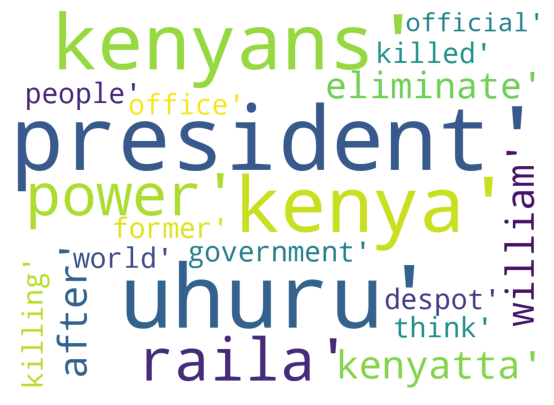

In [18]:
plt.figure(figsize=(15,5))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

From the result above it is true that hatespech tweets druring the election were associated with the two presidential candidates i.e Raila Odinga and William Ruto.

Synonimous word kill including "eliminate", "killing" and "killed" were also used in tweets.

## `Sentimental Analysis`
Let's analyse the sentiments of tweets:

In [19]:
df_sen = df[df['Sentiment'].isin(['Positive', 'Negative'])]
df_sen['Sentiment'].value_counts()

Sentiment
Negative    11341
Positive     2127
Name: count, dtype: int64

Most of the tweets that had hatespeech phrases have negative sentiments.
This is as expected since hatespeech involves demeaning a party. Why is another reason.

## `Retweet Analysis`
Here one can determine networks of amplification that make tweets and hashtags trend:

In [20]:
Retweeted=df['tweet'].str.extract(r'(RT @\w+)')
df['Source'] = Retweeted
df['Source'] = df['Source'].apply(lambda x: str(x).replace('RT ', ''))
df.rename(columns={'Source' :'source'},inplace=True)

In [21]:
#standardize usernames
df['source'] = df['source'].apply(lambda x: str(x).lower())
df['target'] = df['target'].apply(lambda x: str(x).lower())

### Top retweeted accounts: The accounts that received the most number of retweets 

In [22]:
top_retweeted_accs = list(df['source'].value_counts()[1:12].keys())
_influencers = df[df['target'].isin(top_retweeted_accs)][
    ['target','Twitter Screen Name','Twitter Followers','User Profile Url','Country','Sentiment']
]
_influencers.drop_duplicates(subset=['target'],keep='first', inplace=True)

# add count of retweets 
retweet_count = dict(df['source'].value_counts()[1:12])
_influencers['Retweets'] = _influencers['target'].replace(retweet_count)

_influencers = _influencers.sort_values(by=['Retweets'],ascending=False)
_influencers

,target,Twitter Screen Name,Twitter Followers,User Profile Url,Country,Sentiment,Retweets
80,@migunamiguna,Dr. Miguna Miguna,2297720.0,http://www.twitter.com/MigunaMiguna,Unknown,Negative,1983
4525,@ahmednasirlaw,Ahmednasir Abdullahi SC,1993938.0,http://www.twitter.com/ahmednasirlaw,Kenya,Negative,1949
18719,@thriving_luos,DHOLUO DICTIONARY,17206.0,http://www.twitter.com/Thriving_luos,Kenya,Positive,852
826,@citizentvkenya,Citizen TV Kenya,4921269.0,http://www.twitter.com/citizentvkenya,Kenya,Neutral,546
13886,@itsmutai,Lord Abraham Mutai,715137.0,http://www.twitter.com/ItsMutai,Kenya,Negative,537
2814,@gabrieloguda,Gabriel Oguda,518585.0,http://www.twitter.com/gabrieloguda,Kenya,Neutral,489
5153,@dan_nyagah,Dan Nyagah,64039.0,http://www.twitter.com/dan_nyagah,Unknown,Negative,429
1006,@nahashonkimemia,Nahashon Kimemia,94248.0,http://www.twitter.com/NahashonKimemia,Kenya,Negative,392
5494,@mondayomoaigbe,@mondayomoaigbe,7870.0,http://www.twitter.com/mondayomoaigbe,Unknown,Negative,375
9771,@davidkevindw3,David Kevin,1771.0,http://www.twitter.com/DavidKevinDw3,United States,Neutral,309


The above shows the top ten accounts whose content recieved a lot of retweets. That is amplified by other Twitter users.

#### Top Retweeted Tweets
The top retweeted tweets include:

In [23]:
df['tweet'].value_counts().rename_axis('Tweets').reset_index(name='counts')[:10]

,Tweets,counts
0,RT @ahmednasirlaw: When I used to tell Kenyans/world that former President Uhuru's Government used to kill Kenyans as an official governmental policy you used to think I was an alarmist. JACOB JUMA was Killed by this team after he left my office on that fateful day. I know who ordered his killing!,1610
1,"RT @Thriving_luos: OGINGA TO Raila Odinga IN 1992 ‘’ I named you after my Mother , a good woman, remember three things and hold them , 1- Do not kill for power. I your Father I’m going to the grave empty handed because I refused to kill for power, if you have to kill in order to get power, refuse https://t.co/sqKkv3z4Vx",852
2,"RT @MigunaMiguna: This is RUBBISH, @MutahiNgunyi. Stop lying. Despot Uhuru Kenyatta tried everything: speaking in his mother tongue, bribery, threats, torture and abductions to impose conman @RailaOdinga in power. He even sent SECURITY MANDARINS to threaten @WChebukati. Did you want him to kill? https://t.co/kB627RTgGG",551
3,"RT @ItsMutai: Najib Balala was bribed with Ksh100million by NGOs to kill 11 rhinos. Some of us called for his resignation. Nothing happened. He called a press conference and literally told me, Lord Abraham Mutai ""Fvck you"". Now he wants to be RETAINED in President William Ruto's Gvt, laughable",537
4,RT @gabrieloguda: Nandi Senator Samson Cherargei is on my television claiming that maize cartels in the Ruto administration want to kill maize farming in Kenya. Semeni dynasty mbaya.,489
5,RT @MigunaMiguna: Despot Uhuru Kenyatta is so desperate to cling to power that he was - and still is - determined to plunge Kenya into civil strife and kill thousands of innocent civilians whose only crime was to have defied him and refused to vote for conman @RailaOdinga. We must STOP him.,487
6,"RT @MigunaMiguna: Patriots and Freedom Fighters: Let us make sure we CRIPPLE despot Uhuru Kenyatta POLITICALLY and PERMANENTLY so that he cannot try another attempt to overthrow the WILL of the PEOPLE. Cut off his TENTACLES in MUNGIKI, KweKwe and MILITARY FORMATIONS. This is URGENT.",424
7,RT @MigunaMiguna: THE DESPOT'S CONUNDRUM 1. Despot Uhuru Kenyatta wants to use @mucheru's fake form 34As to have @WilliamsRuto's victory nullified. 2. But they know Ruto will defeat conman @RailaOdinga in fresh elections even if they kill all the IEBC ROs. Hence plan 3. To be exposed later.,393
8,RT @DavidKevinDw3: Dear @WilliamsRuto: In what sense of measure you’ve labeled #AbyiAhmed as genius?? Is that: 👉coz he invited foreign force of #Eri🇪🇷to eliminate Tigary ppl? 👉coz he put 7M the ppl under 2yrs old siege? 👉coz he is launching drone attacks on civilians & #IDPs? @SecBlinken ; Prime Minister Abiy Ahmed is a genius leader and the people of Ethiopia are lucky - President Ruto https://t.co/1xyiWIjnWl,309
9,RT @citizentvkenya: Hustlers fund will not be free. It is money to be used for business activities & you will have to repay this money. We will eliminate shylocks & repayment will be less than 10% interest - President William Ruto https://t.co/li2oCIRQjG,293


### Top Accounts that posted original tweets in the network


This section identifies the key accounts that posted original tweets. The aim is to understand who created most of the tweets or narratives.

In [24]:
#get original data
No_Retweets=df[df['tweet'].str.contains('RT')== False]
original=No_Retweets[~No_Retweets['tweet'].str.contains('QT')]

top_seeder_accs = list(original['target'].value_counts()[:10].keys())
tweets = dict(original['target'].value_counts()[:10])
_seeders = df[df['target'].isin(top_seeder_accs)][
    ['target','Twitter Screen Name','Twitter Followers','User Profile Url']
]
_seeders.drop_duplicates(subset=['target'],keep='first', inplace=True)
_seeders['tweets_posted' ] = _seeders['target'].replace(tweets)
_seeders.sort_values(by=['tweets_posted'],ascending=False)

,target,Twitter Screen Name,Twitter Followers,User Profile Url,tweets_posted
34,@nguthudennis,Atalanta BAIB,1354.0,http://www.twitter.com/NguthuDennis,44
241,@lloyd45478399,Baba Mboga,280.0,http://www.twitter.com/Lloyd45478399,27
670,@danielmagita,Daniel Magita,32.0,http://www.twitter.com/DanielMagita,22
31,@saidimusalim1,Saidimu Saidimu 🇰🇪🇺🇬🇹🇿,1097.0,http://www.twitter.com/saidimusalim1,17
1357,@vuma_trends,VUMA TRENDS,4489.0,http://www.twitter.com/vuma_trends,15
629,@sholla_saddam,Sholla,4891.0,http://www.twitter.com/sholla_saddam,14
3092,@bazengaake,Bazenga,2305.0,http://www.twitter.com/BazengaaKE,14
6054,@v_katama,Katama V. Naibei,1223.0,http://www.twitter.com/V_katama,14
21,@sharpsh05380877,Sharp Shooter,154.0,http://www.twitter.com/SharpSh05380877,13
650,@thekenyanpost,DAILY POST,53907.0,http://www.twitter.com/TheKenyanPost,12


#### Top Accounts that posted quoted tweets in the network


This section tries to identify the key influencers within the twitter data by extracting the unique accounts and counting the total number of quoted tweets from these accounts. The aim is to understand who amplified most of the tweets or narratives through quotes.

In [25]:
Q = df[df['tweet'].str.startswith("QT", na=False)]
quoted=Q['target'].value_counts().loc[lambda x: x>5]
quoted

target
@manric540          14
@madametrois        12
@jaeconomics         7
@keru_ronald         7
@nenstorg2011        6
@beatric06754363     6
@bgookiiry           6
Name: count, dtype: int64

## `Network Analysis`
### Archive Gephi file
Gephi file is a file that helps in determining coodinated networks between original content creators and those that retweet their tweets.
This way you can determine groups of networks that drive a particular narrative on the social media space.

The file can then be viewed and networks determined by the [gephi](https://gephi.org/) tool.

In [26]:
data_expo = df[df['source'] != 'nan'].reset_index(drop=True)
data_expo.index = data_expo.index.set_names(['Index'])
data_expo = data_expo.rename(columns={'source':'Source',
                          'target':'Target'})

data_expo.to_csv('.gephi_ready_file_hatespeech.csv')

## `Conclusion`
From the above analysis, we can therefore conclude that narratives on Twitter are driven by particular groups that involves a user posting a tweet and network of accounts amplifying the narrative through a tweet by retweeting and quoting. Why amplification occurs coould be because of financial gain or political gain as in the election period where politicians demean opposing candidates. Not all narratives are true some have a bias. This then makes Twitter as a tool for misinformation, disinformation and malinformation.